# IS318 - Machine Learning
## TP2 - Linear classification

The goal of this TP is to experiment with linear models for classification.

In [932]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

### 1. Dataset

We will work with a synthetic binary classification dataset:

(500, 2) (500,)


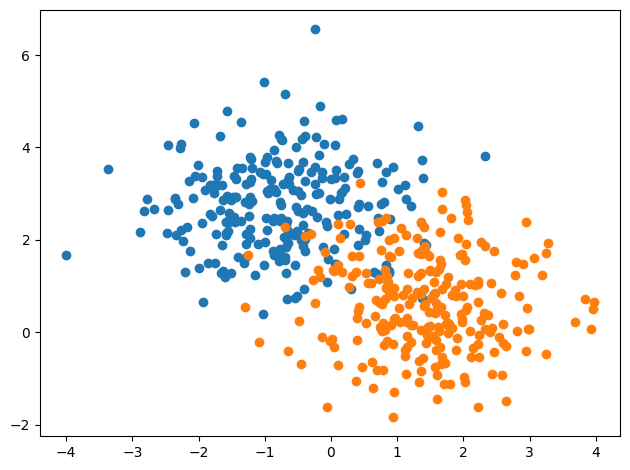

In [933]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, center_box=(-3, 3), random_state=42) # Easy
# X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2) # Harder
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.tight_layout()
print(X.shape, y.shape)

Before implementing a classification method, we will apply some preprocessing steps.

**(Question)** Preprocessing: normalize the data such that it has zero mean and unit variance. To do that, for each feature, substract the mean and divide by the standard deviation over the samples. Plot the data.

This procedure is called *standardization*.
It is useful for numerical stability (notably for gradient descent).

In [934]:
# YOUR CODE HERE
u0 = np.mean(X[:,0])
u1 = np.mean(X[:,1])
std0 = np.std(X[:,0])
std1 = np.std(X[:,1])

X[:,0] = (X[:,0] - u0) / std0
X[:,1] = (X[:,1] - u1) / std1

print("mean :", np.mean(X[:,0]), np.mean(X[:,1]))
print("Standard deviation : ",np.std(X[:,0]), np.std(X[:,1]))

print(X[0])

mean : 3.552713678800501e-18 -1.3855583347321954e-16
Standard deviation :  1.0 1.0
[-1.07276255  0.58380325]


In [935]:
assert np.allclose(X.mean(axis=0), 0.)
assert np.allclose(X.var(axis=0), 1.)

**(Question)** Plot the data points as above to observe the difference of standardization.

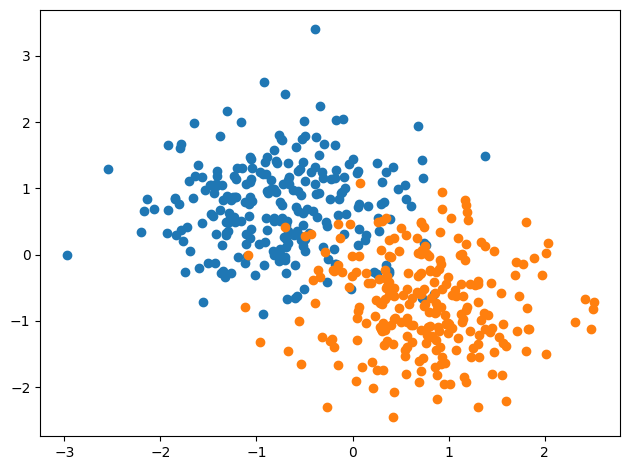

In [936]:
# YOUR CODE HERE

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.tight_layout()

**(Question)** As usual, add a column with ones to simplify dot product notation. Then, split the dataset into training and validation sets.

In [937]:
# YOUR CODE HERE

X_ = np.zeros((500,3))
X_[:,1:] = X 
X_[:,0] = np.ones(500)
X = X_

print(X.shape)

(500, 3)


In [938]:
mask = np.linspace(0,1,X.shape[0]) < 0.75

shuffled_indices = np.arange(0,X.shape[0])
np.random.shuffle(shuffled_indices)

X = X[shuffled_indices]
y = y[shuffled_indices]

X_train, y_train, X_test, y_test = X[mask], y[mask], X[~mask], y[~mask]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(375, 3) (125, 3)
(375,) (125,)


In [939]:
assert X.shape[1] == 3
assert np.all(X[:, 0] == 1.)

**(Question)** With real data, it is considered wrong to apply standardization before splitting the dataset. Can you explain why?

When applying the standardization before splitting the data set, the resulting mean and standard deviation may not represent the distribution in the training and testing set. Another issue is that the training set will contain information about the testing set (the mean and standard deviation also include points from the testing set in this case) which supposed to be unseen in the training phase. 

The mean and standard deviation are different before and after splitting the data.

### 2. Logistic regression

**(Question)** Complete the `LogisticRegression` class below to implement logistic regression for binary classification.
- For the `fit` method, implement a simple gradient descent on the binary cross entropy loss. Record the evolution of the loss over the iterations in the `loss_hist` attribute.
- For the `predict` method, compute predictions from the model and return the binary decisions by thresholding at $0.5$.

In [940]:
class LogisticRegression():
    
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.loss_hist = []
        self.w = None
    
    def sigmoid(self, x):
        # YOUR CODE HERE
        return 1 / (1 + np.exp(-x))

    def binary_cross_entropy(self, y, y_pred):
        # YOUR CODE HERE
        return -(1 / len(y)) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
        
    def fit(self, X, y):
        # YOUR CODE HERE
        N = len(X)
        self.w = np.zeros((X.shape[1],1))
        y_hat = self.sigmoid(X @ self.w)
        for _ in range(self.n_iters):
            self.w -= self.learning_rate * (1 / N) * (X.T @ (y_hat - y.reshape(-1,1)))
            y_hat = self.sigmoid(X @ self.w)
            self.loss_hist.append(self.binary_cross_entropy(y.reshape(-1,1), y_hat))
    
    def predict(self, X):
        # YOUR CODE HERE
        # computes the array of probabilities 
        return np.array([0 if elt < 0.5 else 1 for elt in self.sigmoid(X @ self.w)])

**(Question)** Apply your logistic regression model with default arguments to our synthetic dataset. Report the classification accuracy on the training and validation sets.

In [941]:
# YOUR CODE HERE

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [942]:
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.952


Text(0.5, 1.0, 'loss hist')

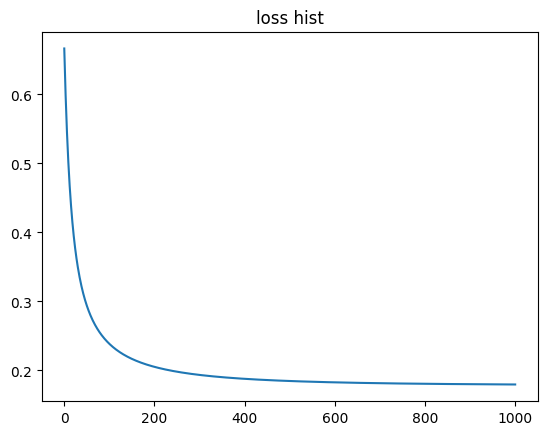

In [943]:

x = np.linspace(0,1000, model.n_iters)
plt.plot(x, model.loss_hist, label="loss")
plt.title("loss hist")



**(Question)** Plot the decision boundary on top on the data points.

*Hint*: to compute the decision boundary, start from its equation and transform it to an usual affine formulation.

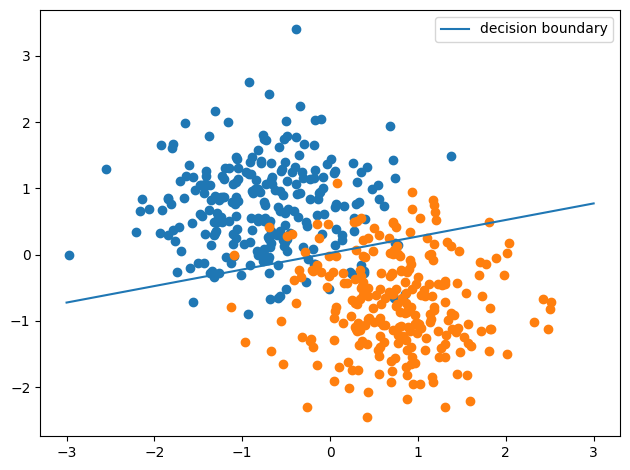

In [944]:
w = model.w

x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100) 
y_ = w[0] + w[1]*x1 + w[2]*x2

plt.plot(x1, y_, label="decision boundary")
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0])
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1])
plt.legend()
plt.tight_layout()


**(Question)** Play around with the `learning_rate` and `n_iters` hyperparameters to see the impact on gradient descent convergence.
Plot the evolution of the loss over the iterations for different learning rates.
Comment the results.

C:\Users\ayman\AppData\Local\Temp\ipykernel_64296\1217372023.py:15: RuntimeWarning: divide by zero encountered in log
  return -(1 / len(y)) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
C:\Users\ayman\AppData\Local\Temp\ipykernel_64296\1217372023.py:15: RuntimeWarning: invalid value encountered in multiply
  return -(1 / len(y)) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))


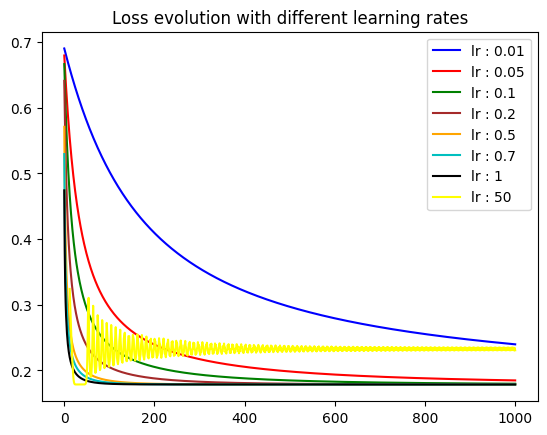

<ErrorbarContainer object of 3 artists>

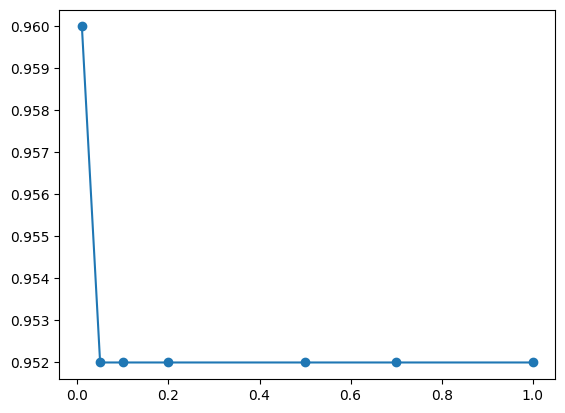

In [945]:
# YOUR CODE HERE
l_rates = [0.01,0.05,0.1,0.2,0.5,0.7,1,50]
colors = ['b','r','g','brown','orange','c','black','yellow','brown']
x = np.linspace(0,1000,1000)
loss_hists = []
accs = []
for i in range(len(l_rates)):
    model = LogisticRegression(learning_rate=l_rates[i])
    model.fit(X_train, y_train)
    loss_hists.append(model.loss_hist)
    plt.plot(x,model.loss_hist, color=colors[i], label=f'lr : {l_rates[i]}')
    y_pred = model.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))

plt.title('Loss evolution with different learning rates')
plt.legend()
plt.show()

plt.errorbar(l_rates[:-1], accs[:-1], fmt='o-')



From the figure above, we can observe that various learning rates lead to different convergence speeds, eventually reaching a local minimum. Notably, the model trained with a learning rate of 0.01, which didn't reach the local minimum, performs better in terms of testing set accuracy. This observation suggests that faster convergence, achieved with higher learning rates, may lead to overfitting.

Additionally, the choice of learning rate affects the model's ability to generalize and become more robust. Slower steps towards the global minimum, achieved with lower learning rates, tend to promote better generalization.

Furthermore, it's important to note that with higher learning rates, fluctuations in the loss function are observed. These fluctuations may seem unusual, given that the loss function is convex. Upon further investigation, it becomes apparent that these fluctuations might be attributed to floating-point errors. When the model takes large steps towards the minimum, it can encounter numerical precision issues, resulting in very small numbers that may lead to floating-point problems and cause the error to increase once again

### 3. Gaussian generative model

**(Question)** Complete the `GaussianGenerativeModel` class below.

In [946]:
class GaussianGenerativeModel():

    def fit(self, X, y):
        # YOUR CODE HERE
        self.N = len(y)
        self.N0 = len(y[y == 0])
        self.N1 = len(y[y == 1])
        self.phi = self.N1 / self.N
        self.mu1 = (1 / self.N1) * (X.T @ y.reshape(-1,1))
        self.mu0 = (1 / self.N0) * (X.T @ (1 - y.reshape(-1,1)))
        self.mu = [self.mu0, self.mu1]
        self.sigma = (1 / self.N) * (((X.T - self.mu0) @ (X.T - self.mu1).T) + 1e-5)
        self.w = np.linalg.inv(self.sigma) @ (self.mu1 - self.mu0)
    
    def sigmoid(self, x):
        # YOUR CODE HERE
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        # YOUR CODE HERE
        return np.array([0 if elt < 0.5 else 1 for elt in self.sigmoid(X @ self.w)])

**(Question)** Apply your gaussian generative model to our synthetic dataset. Report the classification accuracy on the training and validation sets.

*Hint:* The column with ones is not needed for this model.

In [947]:
# YOUR CODE HERE
lda_model = GaussianGenerativeModel()

X_train_nones, X_test_nones = X_train[:,1:], X_test[:,1:]

lda_model.fit(X_train_nones, y_train)

y_pred_lda = lda_model.predict(X_test_nones)

print("Acc :", accuracy_score(y_test, y_pred_lda))

Acc : 0.952


**(Question)** Plot the decision boundary on top on the data points and compare it with the one obtained with logistic regression.

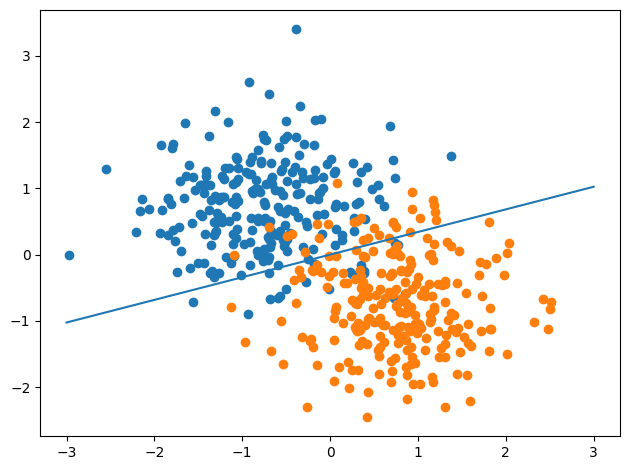

In [948]:
# YOUR CODE HERE
w = lda_model.w

x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100) 
y_ = w[0]*x1 + w[1]*x2

plt.plot(x1, y_,label="decision boundary")
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0])
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1])
plt.tight_layout()

### 4. Comparison with `sklearn`

**(Question)** Apply logistic regression using the `LogisticRegression` class from the `scikit-learn` library. Compare the results with your previous implementation.

*Hints:*
- If your features are already augmented with a column of ones, set the `fit_intercept` parameter to `False`
- Set `penalty` (regularization to `None` to match your unregularized implementation

In [949]:
from sklearn.linear_model import LogisticRegression as LogisticRegressionSklearn
# YOUR CODE HERE
sk_model = LogisticRegressionSklearn(fit_intercept=False, penalty=None)

sk_model.fit(X_train, y_train)

y_pred_sk = sk_model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_sk))




Accuracy :  0.952


### 5. Application to breast cancer dataset

In [950]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

**(Question)** Load the data into `X` and `y` variables. Familiarize yourself with this dataset. What are the dimensions? Explain what they mean.

In [951]:
import pandas as pd

df = pd.DataFrame(dataset, columns = dataset.feature_names)
df['target'] = dataset.target

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   mean radius              0 non-null      object
 1   mean texture             0 non-null      object
 2   mean perimeter           0 non-null      object
 3   mean area                0 non-null      object
 4   mean smoothness          0 non-null      object
 5   mean compactness         0 non-null      object
 6   mean concavity           0 non-null      object
 7   mean concave points      0 non-null      object
 8   mean symmetry            0 non-null      object
 9   mean fractal dimension   0 non-null      object
 10  radius error             0 non-null      object
 11  texture error            0 non-null      object
 12  perimeter error          0 non-null      object
 13  area error               0 non-null      object
 14  smoothness error         0 non-null      o

In [952]:
# YOUR CODE HERE
X, y = dataset['data'], dataset['target']

print(X.shape, y.shape)

(569, 30) (569,)


YOUR ANSWER HERE

**(Question)** Split into train/test and preprocess the data.

In [953]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


**(Question)** Apply your implementations of logistic regression and gaussian generative model to this dataset.

In [954]:
# YOUR CODE HERE
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))

C:\Users\ayman\AppData\Local\Temp\ipykernel_64296\1217372023.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\ayman\AppData\Local\Temp\ipykernel_64296\1217372023.py:15: RuntimeWarning: divide by zero encountered in log
  return -(1 / len(y)) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
C:\Users\ayman\AppData\Local\Temp\ipykernel_64296\1217372023.py:15: RuntimeWarning: invalid value encountered in multiply
  return -(1 / len(y)) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))


Accuracy :  0.9298245614035088


In [955]:
# YOUR CODE HERE
model_gauss = GaussianGenerativeModel()

model_gauss.fit(X_train, y_train)

y_pred_gauss = model_gauss.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_gauss))

Accuracy :  0.3684210526315789


**(Question)** Apply cross-validation (see `sklearn.model_selection`) on your implementations to successively train several models and obtain predictions for the whole dataset.
Comment the results.

YOUR ANSWER HERE